# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding Latitude and Longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#set url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#create an empty list for weather data from each city
city_data = []

#print
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counter to record
record_count = 1
set_count = 1

#loop through cities in previous list
for i, city in enumerate(cities):

    #create groups of 50 cities - logging
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #incriment increase for count
    record_count += 1

    #run api for each city in list
    try:
        #rip from 6.2.4 as house best practice
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            #city variables we want
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind_speed = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

            #add those variables to the list!
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"Oops. The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    #skip city if error occurs
    except:
        print("City not found. Skipping...")
        pass

    #pause to avoid rate limiting
    time.sleep(1)

#tell me when this is over
print("-----------------------------")
print("Data Retrieval Complete!      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | picota
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | brezina
Processing Record 11 of Set 1 | utrik
Processing Record 12 of Set 1 | katsuren-haebaru
Processing Record 13 of Set 1 | kosciuszko national park
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | klyuchi
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | kyurdarmir
City not found. Skipping...
Processing Record 18 of Set 1 | nadi
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 

In [5]:
#make it a pandas df w/ counts
city_df = pd.DataFrame(city_data)
city_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Pressure      550
Country       550
Date          550
dtype: int64

In [7]:
#check it out
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Lihue,21.9789,-159.3672,74.79,83,75,7.54,1020,US,1733937947
1,Picota,-6.9197,-76.3304,94.26,42,99,7.54,1010,PE,1733937948
2,Edinburgh of the Seven Seas,-37.0676,-12.3116,58.48,75,100,7.54,1022,SH,1733937949
3,Port-aux-Français,-49.3500,70.2167,41.95,88,92,7.54,981,TF,1733937950
4,Dudinka,69.4058,86.1778,8.37,91,100,7.54,997,RU,1733937951


In [8]:
#export to a .csv by City_ID
city_df.to_csv("output_data/cities_eewimmer.csv", index_label="City_ID")

In [13]:
#read and display saved data
city_id_df = pd.read_csv("output_data/cities_eewimmer.csv", index_col="City_ID")
city_id_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Lihue,21.9789,-159.3672,74.79,83,75,7.54,1020,US,1733937947
1,Picota,-6.9197,-76.3304,94.26,42,99,7.54,1010,PE,1733937948
2,Edinburgh of the Seven Seas,-37.0676,-12.3116,58.48,75,100,7.54,1022,SH,1733937949
3,Port-aux-Français,-49.3500,70.2167,41.95,88,92,7.54,981,TF,1733937950
4,Dudinka,69.4058,86.1778,8.37,91,100,7.54,997,RU,1733937951


In [14]:
#clean up that date formate
city_id_df["Date"] = pd.to_datetime(city_id_df.Date * 1e9)
city_id_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Lihue,21.9789,-159.3672,74.79,83,75,7.54,1020,US,2024-12-11 17:25:47
1,Picota,-6.9197,-76.3304,94.26,42,99,7.54,1010,PE,2024-12-11 17:25:48
2,Edinburgh of the Seven Seas,-37.0676,-12.3116,58.48,75,100,7.54,1022,SH,2024-12-11 17:25:49
3,Port-aux-Français,-49.3500,70.2167,41.95,88,92,7.54,981,TF,2024-12-11 17:25:50
4,Dudinka,69.4058,86.1778,8.37,91,100,7.54,997,RU,2024-12-11 17:25:51


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

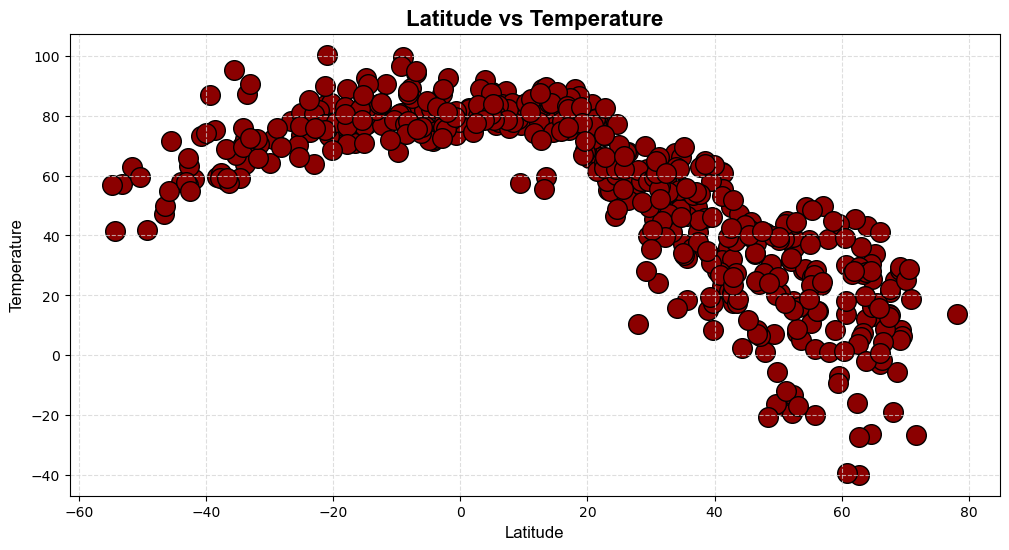

In [53]:
#scatter plot: Latitude vs. Temperautre

#set canvas size
plt.figure(figsize=(12, 6))

#basic plot
plt.scatter(city_id_df.Lat, city_id_df["Max Temp"], color="darkred", edgecolor="black", s=200)

#customize
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show plot
plt.show()

In [ ]:
#After each pair of plots, explain what the linear regression is modeling. 
#Describe any relationships that you notice and any other findings you may uncover.

#This scatterplot is modeling the relationship between latitude and temperature.
#As you move closer to the equator (latitude 0) you see the warmest temerpatures. As you move towards the poles (latitudes -60 and 60)
#tempertures decrease. Temperatures decreased more abrumptly in the postitve latitudes than the negative latitudes this is likely due
#to the 23.5 degree axis of the Earth, suggesting that this data was collected during the winter solstice. 

#### Latitude Vs. Humidity

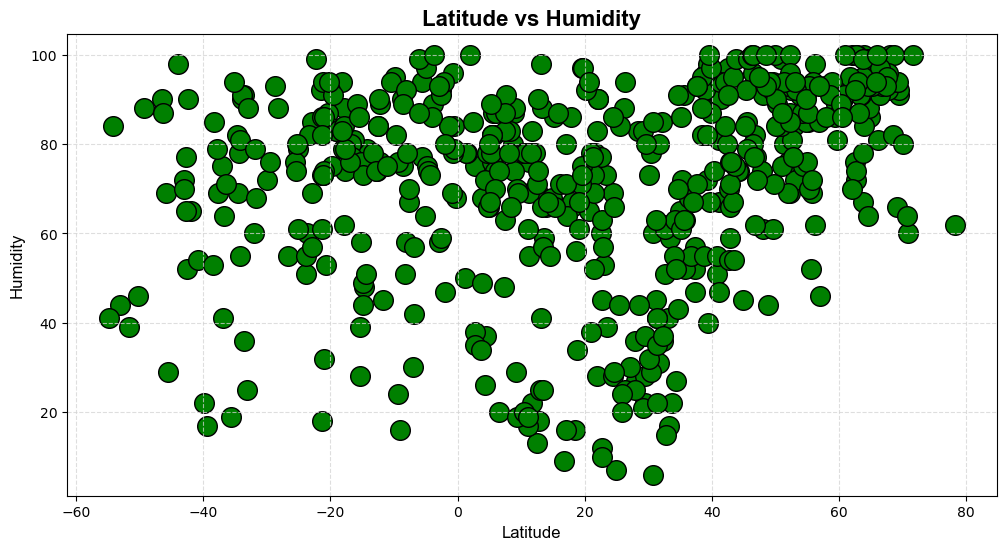

In [48]:
#scatter plot: Latitude vs. Humidity

#set canvas size
plt.figure(figsize=(12, 6))

#basic plot
plt.scatter(city_id_df.Lat, city_id_df["Humidity"], color='green', edgecolor="black", s=200)

#customize
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show plot
plt.show()

In [ ]:
#After each pair of plots, explain what the linear regression is modeling. 
#Describe any relationships that you notice and any other findings you may uncover.

#This scatterplot is modeling the relationship between latitude and humidity.
#As latitude increases from the south pole to the north pole humidity slightly increases. This increased humidity in the north pole
#is likely due to the 23.5 degree tilt of the earth on it's axis and precipitation in the form of snow.

#### Latitude Vs. Cloudiness

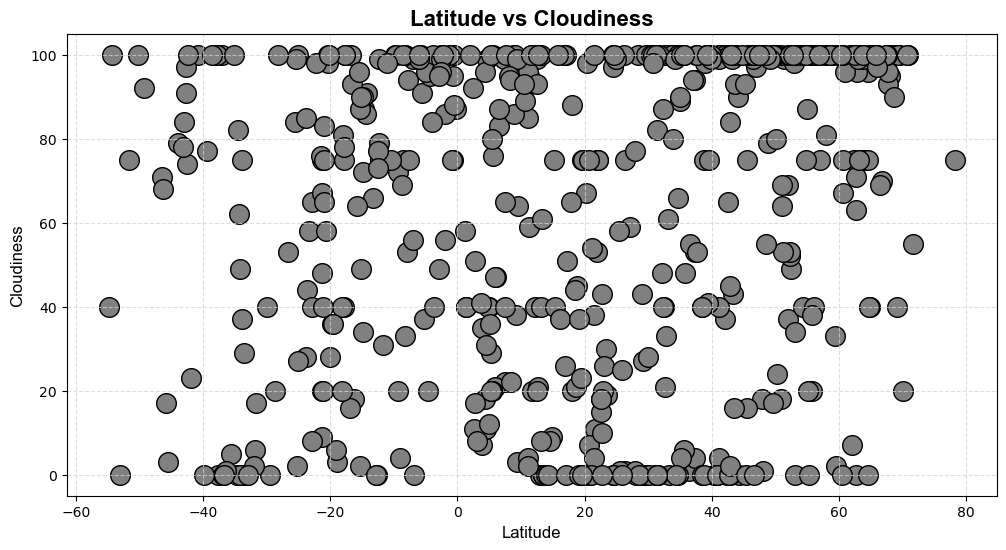

In [49]:
#scatter plot: Latitude vs. Cloudiness

#set canvas size
plt.figure(figsize=(12, 6))

#basic plot
plt.scatter(city_id_df.Lat, city_id_df["Cloudiness"], color='grey', edgecolor="black", s=200)

#customize
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show plot
plt.show()

In [50]:
#After each pair of plots, explain what the linear regression is modeling. 
#Describe any relationships that you notice and any other findings you may uncover.

#This scatterplot is modeling the relationship between latitude and cloudiness.
#As latitude increases from the south pole to the north pole cloudiness slightly increases. This increased cloudiness in the north pole
#is likely due to the 23.5 degree tilt of the earth on it's axis and precipitation in the air in the form of clouds.

#### Latitude vs. Wind Speed Plot

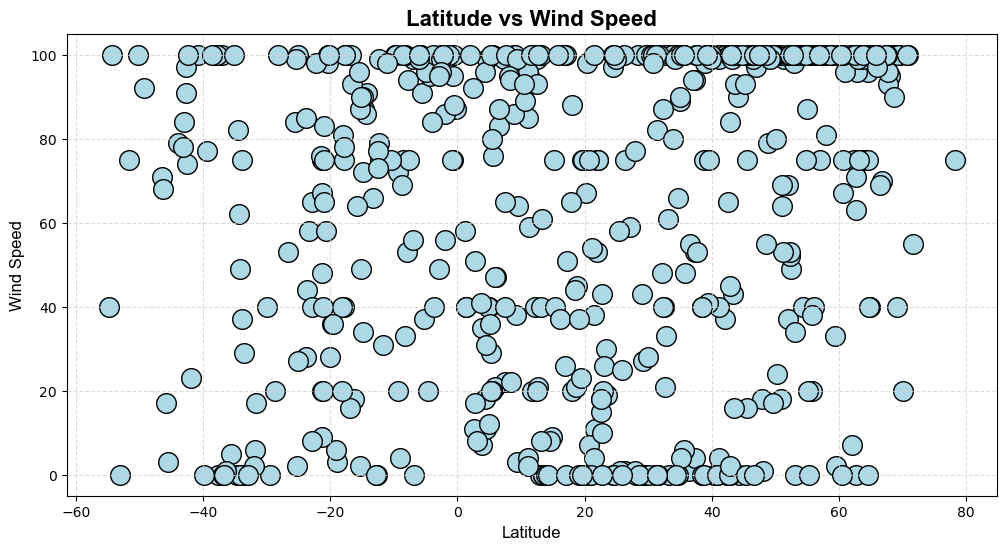

In [51]:
#scatter plot: Latitude vs. Wind Speed

#set canvas size
plt.figure(figsize=(12, 6))

#basic plot
plt.scatter(city_id_df.Lat, city_id_df["Cloudiness"], color='lightblue', edgecolor="black", s=200)

#customize
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show plot
plt.show()

In [ ]:
#After each pair of plots, explain what the linear regression is modeling. 
#Describe any relationships that you notice and any other findings you may uncover.

#This scatterplot is modeling the relationship between latitude and wind speed.
#As latitude increases from the south pole to the north pole, windo speed does not appear to follow a pattern.
#This is likely due to the tradewind route throughout the world - they do not follow allong artutary latitude lines.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots

def do_regression_plot(x_values, y_values, x_label, y_label, annotation):  
    #regression to include r2 value, and equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print(f"R^2 = {r_squared:.4f}")

    #set figure size
    plt.figure(figsize=(12, 6))
    
    #base plot
    plt.scatter(x_values, y_values, color="slategrey", edgecolor="black", s=200)
    plt.plot(x_values, regress_values, color="black", linewidth=2)
    
    #fancy it up
    plt.xlabel(x_label, fontfamily="Arial", fontsize=12)
    plt.ylabel(y_label, fontfamily="Arial", fontsize=12)
    plt.title(f"{x_label} vs {y_label}", fontweight="bold", fontsize=16, fontfamily="Arial")
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    
    #place equation on figure
    plt.annotate(line_eq, annotation, fontsize=15, color="black")
    
    #print figure
    plt.show()

In [55]:
#df with only n. hemisphere (Latitude >= 0)
northern_hemi_df = df.loc[df.Lat >= 0].reset_index(drop=True)

#check it out
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Lihue,21.9789,-159.3672,74.79,83,75,7.54,1020,US,2024-12-11 17:25:47
1,Dudinka,69.4058,86.1778,8.37,91,100,7.54,997,RU,2024-12-11 17:25:51
2,Talnakh,69.4865,88.3972,6.51,92,100,7.54,1000,RU,2024-12-11 17:25:55
3,Brezina,33.0989,1.2608,50.88,41,61,7.54,1015,DZ,2024-12-11 17:25:57
4,Utrik,11.2278,169.8474,81.39,76,95,7.54,1008,MH,2024-12-11 17:25:58


In [74]:
#df with only s. hemisphere (Latitude < 0)
southern_hemi_df = df.loc[df.Lat < 0].reset_index(drop=True)

#check it out
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Picota,-6.9197,-76.3304,94.26,42,99,7.54,1010,PE,2024-12-11 17:25:48
1,Edinburgh of the Seven Seas,-37.0676,-12.3116,58.48,75,100,7.54,1022,SH,2024-12-11 17:25:49
2,Port-aux-Français,-49.3500,70.2167,41.95,88,92,7.54,981,TF,2024-12-11 17:25:50
3,Punta Arenas,-53.1500,-70.9167,57.31,44,0,7.54,1002,CL,2024-12-11 17:21:49
4,Grytviken,-54.2811,-36.5092,41.40,84,100,7.54,1012,GS,2024-12-11 17:25:53


###  Temperature vs. Latitude Linear Regression Plot

R^2 = 0.7326


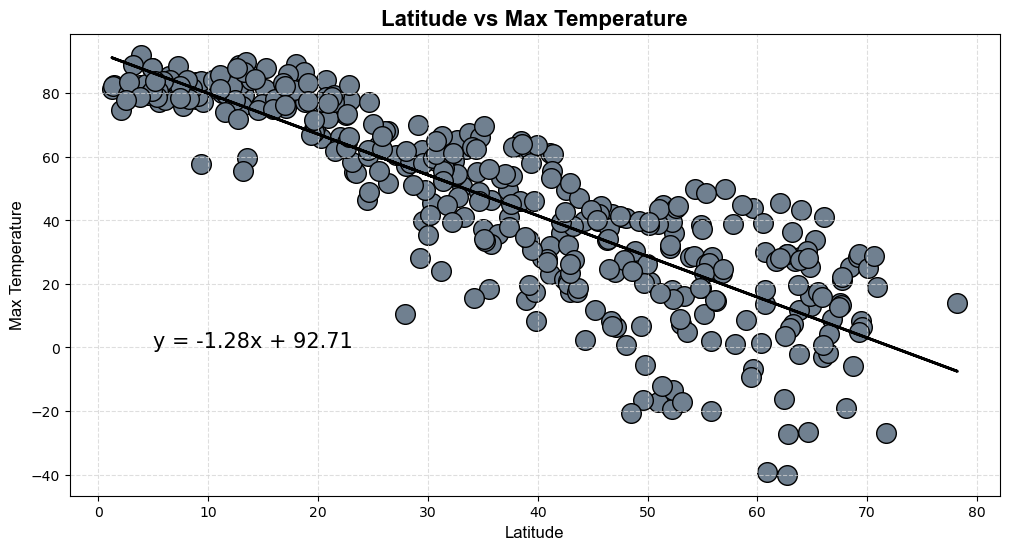

In [75]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (5, 0)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

R^2 = 0.4343


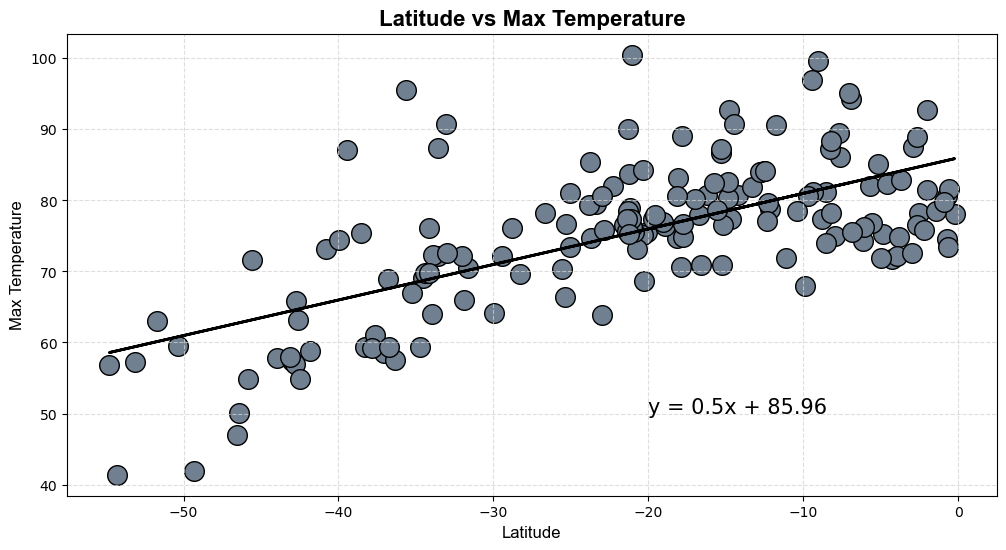

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temperature"
annotation = (-20, 50)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

### 

**Discussion about the linear relationship:** As you move toward either north or south pole temperature decreases, this accounts for 73% and 43% of the data respectively. The relationship between latitude and max temp is stronger in the northern hemisphere than the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R^2 = 0.1762


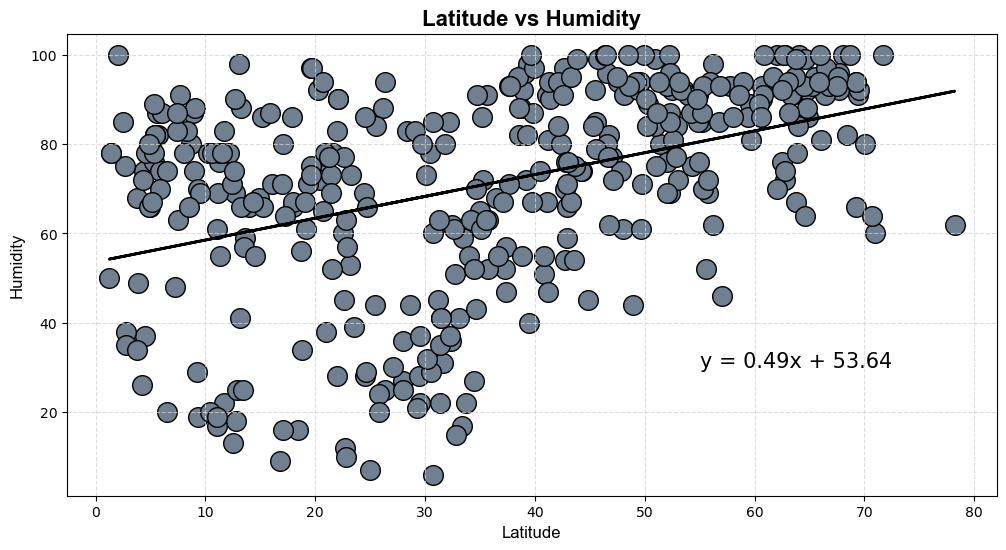

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

R^2 = 0.0393


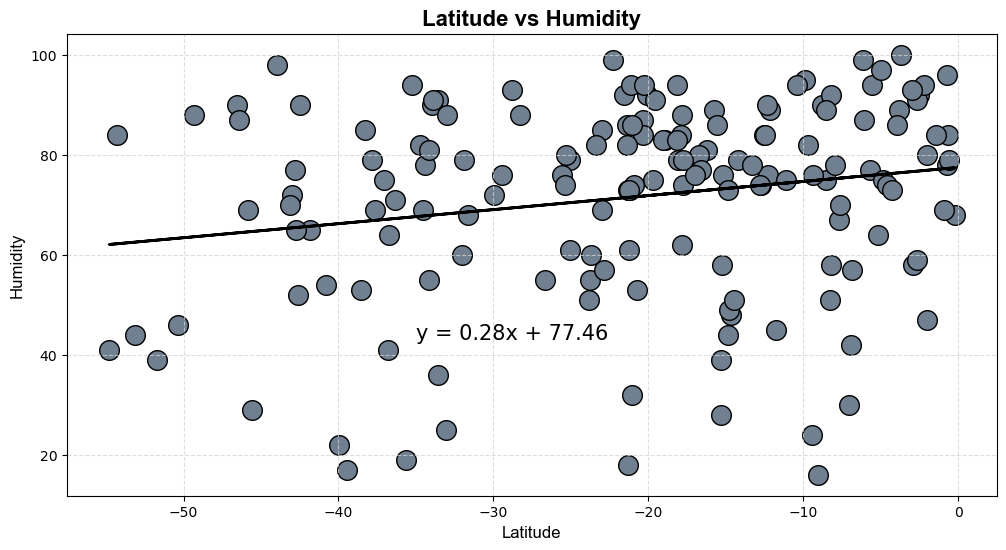

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (-35, 43)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

**Discussion about the linear relationship:** There is a slightly postitive relationship between latitude and humidity as you move
towards the equator for both the southern and northern hemispheres (r2 = 0.18 and 0.04 respectively). This makes sense as the temperatures near the equator are typically hotter due to more direct impact from the sun's UV rays.

### Cloudiness vs. Latitude Linear Regression Plot

R^2 = 0.1762


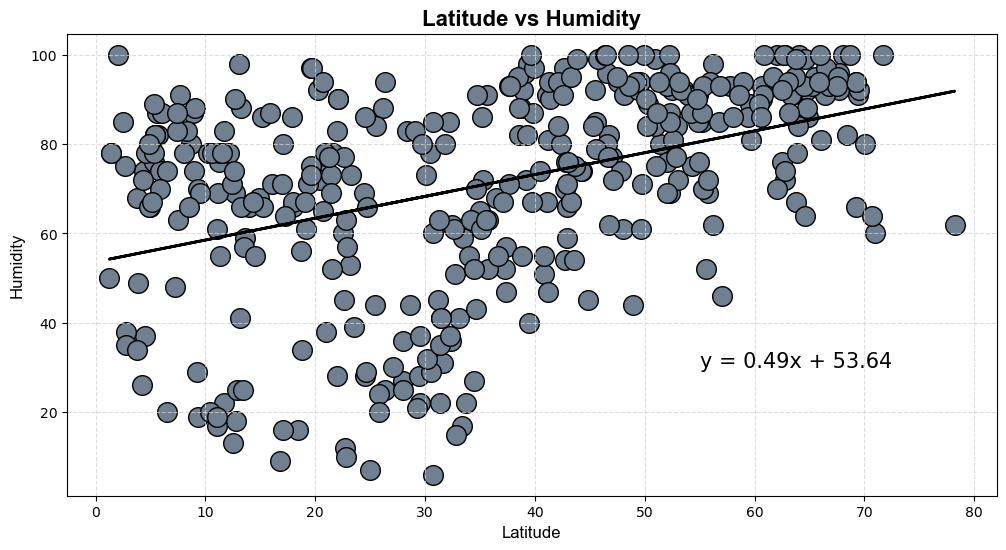

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

R^2 = 0.0589


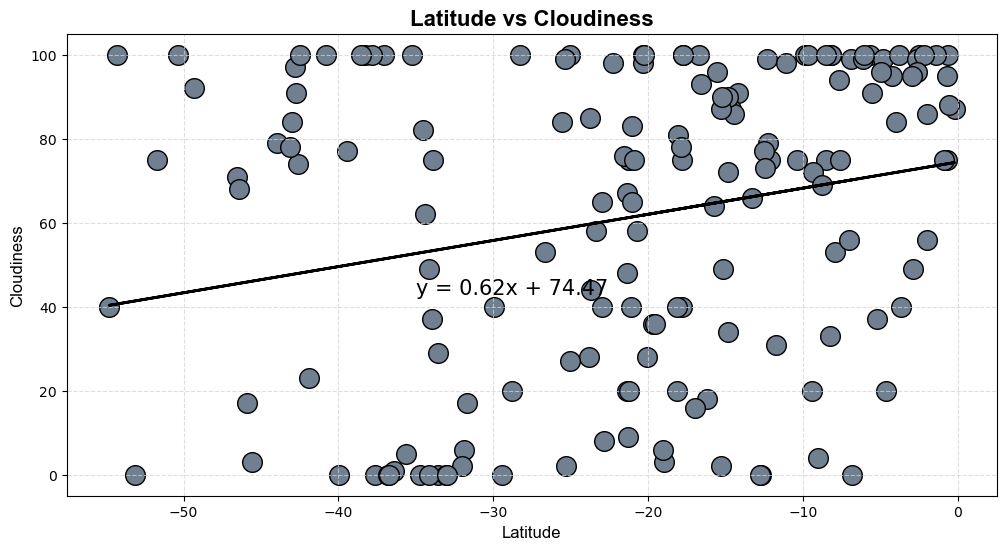

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
annotation = (-35, 43)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

### Wind Speed vs. Latitude Linear Regression Plot

R^2 = 0.0000


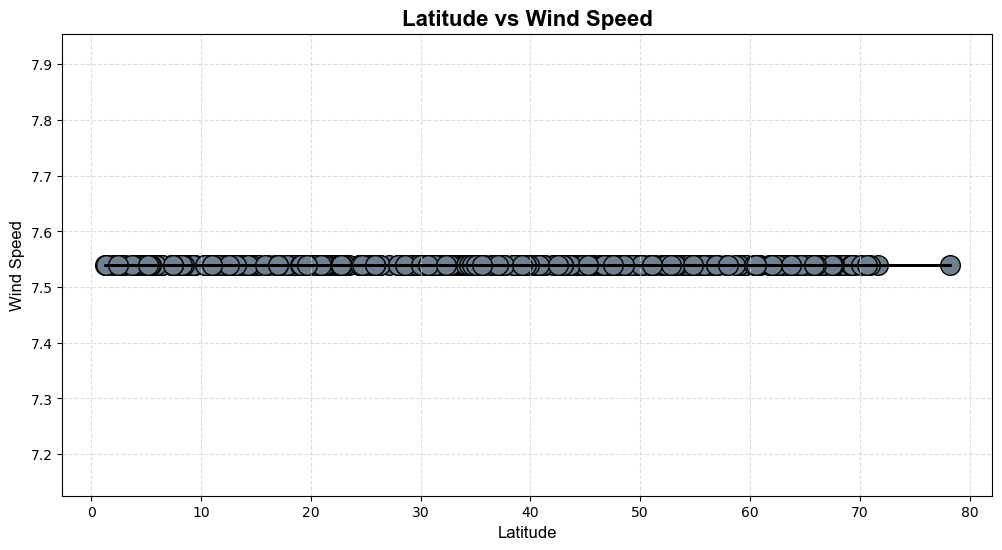

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (55, 30)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)

R^2 = 0.0000


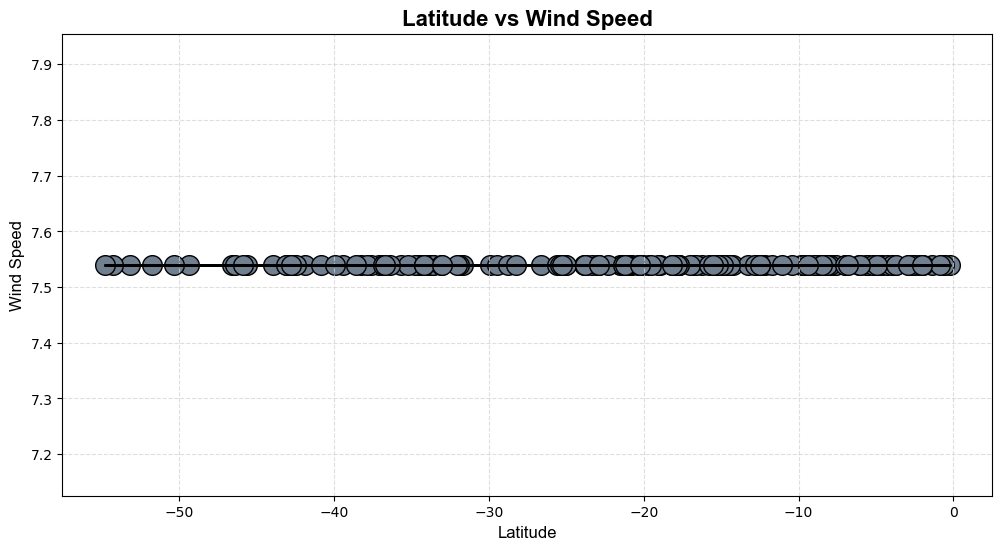

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
annotation = (-35, 43)

do_regression_plot(x_values, y_values, x_label, y_label, annotation)